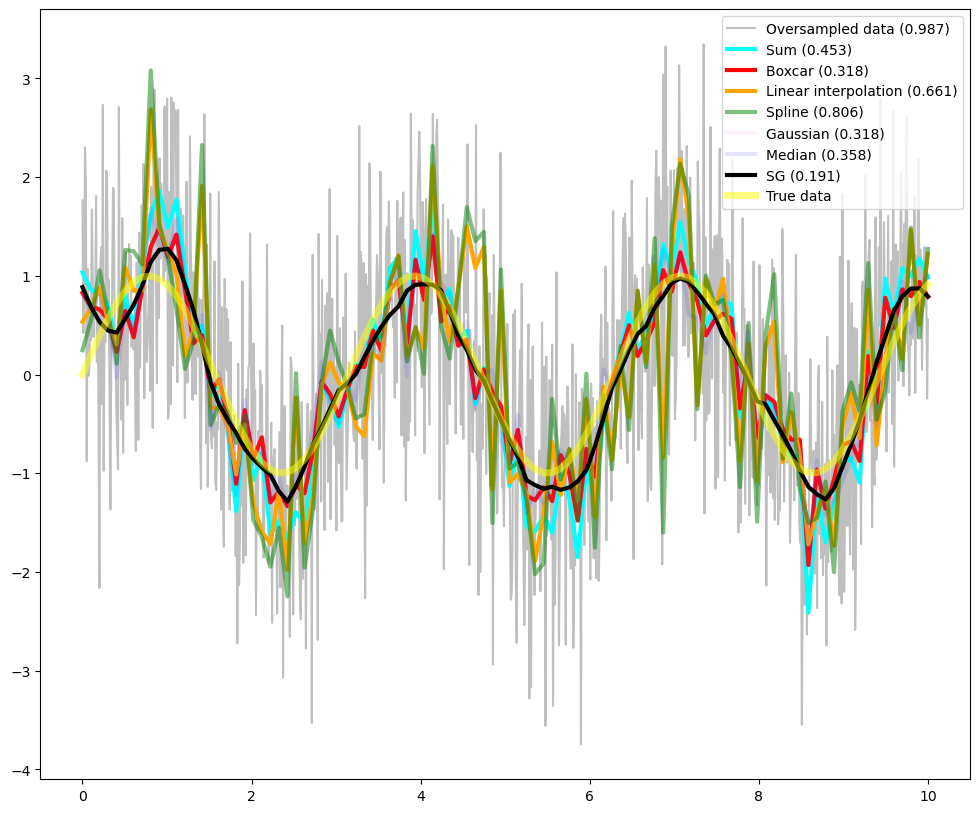

In [22]:
import numpy as np
import scipy
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

def sum_rebin(data, num_bins):
    """
    Rebin data by summing the data inside each bin.

    Parameters:
    data (array): Input data array
    num_bins (int): Number of bins to rebin the data into

    Returns:
    array: Rebin data
    """
    bin_size = len(data) // num_bins
    rebin_data = np.zeros(num_bins)

    for i in range(num_bins):
        start_idx = i * bin_size
        end_idx = (i + 1) * bin_size
        rebin_data[i] = np.sum(data[start_idx:end_idx])

    return rebin_data

def boxcar_rebin(data, num_bins):
    """
    Rebin data using a boxcar algorithm.

    Parameters:
    data (array): Input data array
    num_bins (int): Number of bins to rebin the data into

    Returns:
    array: Rebin data
    """
    bin_size = len(data) // num_bins
    rebin_data = np.zeros(num_bins)

    for i in range(num_bins):
        start_idx = i * bin_size
        end_idx = (i + 1) * bin_size
        rebin_data[i] = np.mean(data[start_idx:end_idx])

    return rebin_data

def linear_interpolation_rebin(data, num_bins):
    """
    Rebin data using linear interpolation.

    Parameters:
    data (array): Input data array
    num_bins (int): Number of bins to rebin the data into

    Returns:
    array: Rebin data
    """
    bin_size = len(data) // num_bins
    rebin_data = np.zeros(num_bins)

    for i in range(num_bins):
        start_idx = i * bin_size
        end_idx = (i + 1) * bin_size
        x = np.linspace(start_idx, end_idx, bin_size)
        y = data[start_idx:end_idx]
        f = scipy.interpolate.interp1d(x, y)
        rebin_data[i] = f(np.mean(x))

    return rebin_data

def spline_rebin(data, num_bins):
    """
    Rebin data using spline interpolation.

    Parameters:
    data (array): Input data array
    num_bins (int): Number of bins to rebin the data into

    Returns:
    array: Rebin data
    """
    bin_size = len(data) // num_bins
    rebin_data = np.zeros(num_bins)

    for i in range(num_bins):
        start_idx = i * bin_size
        end_idx = (i + 1) * bin_size
        x = np.linspace(start_idx, end_idx, bin_size)
        y = data[start_idx:end_idx]
        f = scipy.interpolate.splrep(x, y)
        rebin_data[i] = scipy.interpolate.splev(np.mean(x), f)

    return rebin_data

def gaussian_rebin(data, num_bins, sigma=3.0):
    """
    Rebin data using a Gaussian filter.

    Parameters:
    data (array): Input data array
    num_bins (int): Number of bins to rebin the data into
    sigma (float): Standard deviation of the Gaussian filter

    Returns:
    array: Rebin data
    """
    bin_size = len(data) // num_bins
    rebin_data = np.zeros(num_bins)

    for i in range(num_bins):
        start_idx = i * bin_size
        end_idx = (i + 1) * bin_size
        x = np.linspace(start_idx, end_idx, bin_size)
        y = data[start_idx:end_idx]
        g = scipy.ndimage.gaussian_filter1d(y, sigma)
        rebin_data[i] = np.mean(g)

    return rebin_data

def median_rebin(data, num_bins):
    """
    Rebin data using the median.

    Parameters:
    data (array): Input data array
    num_bins (int): Number of bins to rebin the data into

    Returns:
    array: Rebin data
    """
    bin_size = len(data) // num_bins
    rebin_data = np.zeros(num_bins)

    for i in range(num_bins):
        start_idx = i * bin_size
        end_idx = (i + 1) * bin_size
        rebin_data[i] = np.median(data[start_idx:end_idx])

    return rebin_data


def savgol_rebin(data, num_bins, window_size=101, poly_order=3):
    """
    Smooth data using Savitzky-Golay filter and rebin into specified number of bins.

    Parameters:
    data (array): Input data array
    num_bins (int): Number of bins to rebin the data into
    window_size (int): Window size for Savitzky-Golay filter
    poly_order (int): Polynomial order for Savitzky-Golay filter

    Returns:
    array: Rebin data
    """
    # Smooth data using Savitzky-Golay filter
    smoothed_data = savgol_filter(data, window_size, poly_order)

    # Rebin smoothed data into specified number of bins
    bin_size = len(smoothed_data) // num_bins
    rebin_data = np.zeros(num_bins)

    for i in range(num_bins):
        start_idx = i * bin_size
        end_idx = (i + 1) * bin_size
        rebin_data[i] = np.mean(smoothed_data[start_idx:end_idx])

    return rebin_data

rebin_funcs = (sum_rebin, boxcar_rebin, linear_interpolation_rebin, spline_rebin, gaussian_rebin, median_rebin, savgol_rebin)
rebin_funcs_names = ('Sum', 'Boxcar', 'Linear interpolation', 'Spline', 'Gaussian', 'Median', 'SG')
rebin_flags =       (1,    1,         1,                      0.5,        0.1,          0.1,       1)
rebin_colors = ('cyan', 'red', 'orange', 'green', 'violet', 'blue', 'black')

# Generate some noisy oversampled data
np.random.seed(0)
ybase = np.sin(np.linspace(0, 20, 1000))
ybase_redux = np.sin(np.linspace(0, 20, 100))
ynoise = np.random.normal(0, 1, 1000)
data =  ybase + ynoise 

# Rebin the data using a boxcar algorithm with 100 bins
# Plot the original and rebin data

x = np.linspace(0, 10, 1000)
xx = np.linspace(0, 10, 100)

fig, ax = plt.subplots(figsize=(12, 10))

ystd = np.std(data - ybase)
ax.plot(x, data, label=f'Oversampled data ({ystd:.3f})', color="gray", alpha=0.5)

for func, lab, color, flag in zip(rebin_funcs, rebin_funcs_names, rebin_colors, rebin_flags):
    rebin_data = func(data, 100)
    if lab == 'Sum':
        rebin_data = rebin_data / 8
    ystd = np.std(rebin_data - ybase_redux)
    ax.plot(xx, rebin_data, label=f"{lab} ({ystd:.3f})", lw=3, color=color, alpha=flag)

ax.plot(xx, ybase_redux, label=f'True data', lw=5, color="yellow", alpha=0.5)
ax.legend()
plt.show()